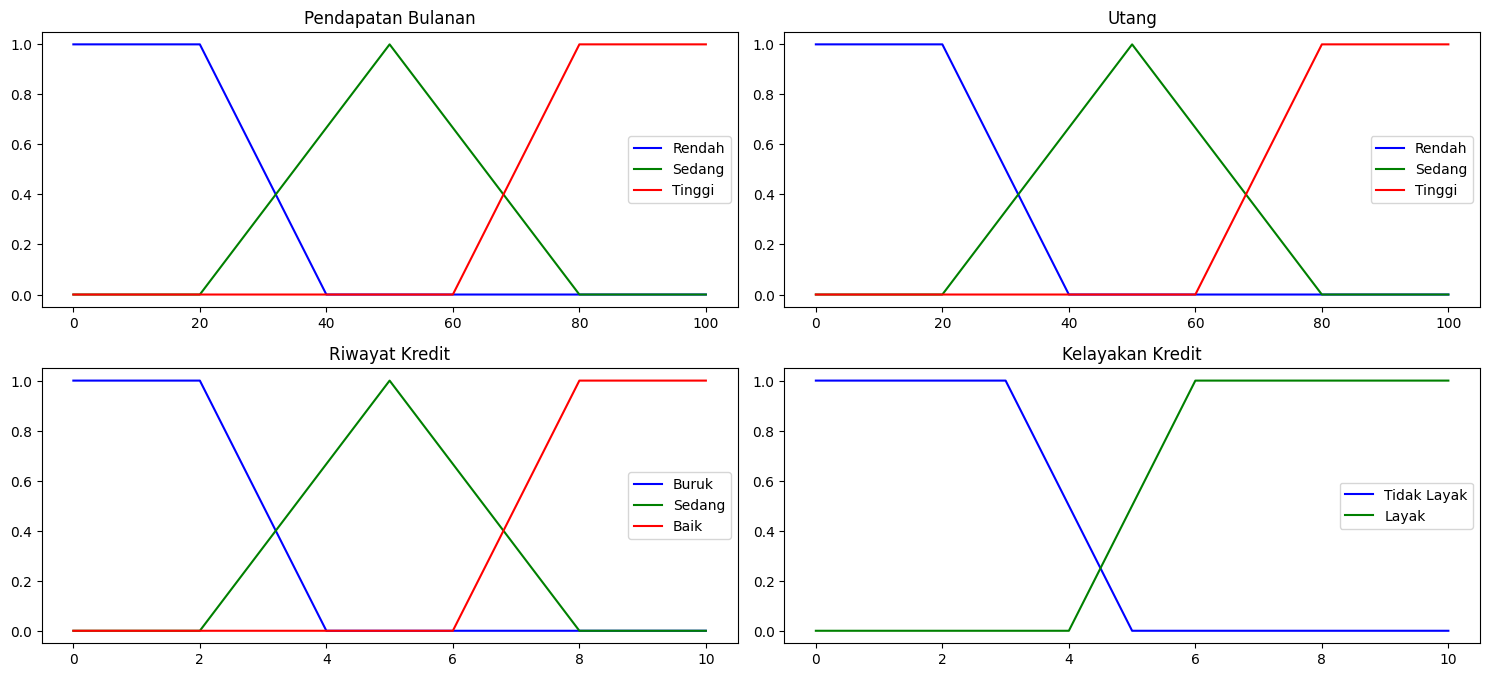

Hasil kelayakan kredit: 7.24 (0-10 skala)


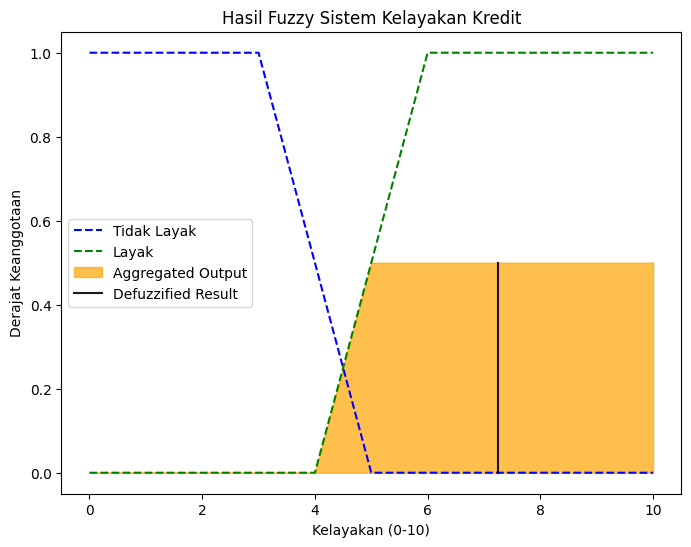

In [2]:
# Nama  : Choiru Nisa
# NIM   : 221011400573
# Kelas : 05TPLM007

# https://github.com/Nisa-source/UAS_Choiru-Nisa_221011400573

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Variabel input (Pendapatan Bulanan, Utang, Riwayat Kredit)
x_pendapatan = np.arange(0, 101, 1)  # 0 - 100 juta
x_utang = np.arange(0, 101, 1)       # 0 - 100 juta
x_riwayat = np.arange(0, 11, 1)      # Skala 0 - 10

# Variabel output (Kelayakan Kredit)
x_kelayakan = np.arange(0, 11, 1)    # Skala 0 - 10

# Fuzzy membership functions
# Pendapatan
pendapatan_rendah = fuzz.trapmf(x_pendapatan, [0, 0, 20, 40])
pendapatan_sedang = fuzz.trimf(x_pendapatan, [20, 50, 80])
pendapatan_tinggi = fuzz.trapmf(x_pendapatan, [60, 80, 100, 100])

# Utang
utang_rendah = fuzz.trapmf(x_utang, [0, 0, 20, 40])
utang_sedang = fuzz.trimf(x_utang, [20, 50, 80])
utang_tinggi = fuzz.trapmf(x_utang, [60, 80, 100, 100])

# Riwayat Kredit
riwayat_buruk = fuzz.trapmf(x_riwayat, [0, 0, 2, 4])
riwayat_sedang = fuzz.trimf(x_riwayat, [2, 5, 8])
riwayat_baik = fuzz.trapmf(x_riwayat, [6, 8, 10, 10])

# Kelayakan Kredit
kelayakan_tidak = fuzz.trapmf(x_kelayakan, [0, 0, 3, 5])
kelayakan_layak = fuzz.trapmf(x_kelayakan, [4, 6, 10, 10])

# Plot membership functions
plt.figure(figsize=(15, 10))

plt.subplot(321)
plt.plot(x_pendapatan, pendapatan_rendah, 'b', label='Rendah')
plt.plot(x_pendapatan, pendapatan_sedang, 'g', label='Sedang')
plt.plot(x_pendapatan, pendapatan_tinggi, 'r', label='Tinggi')
plt.title('Pendapatan Bulanan')
plt.legend()

plt.subplot(322)
plt.plot(x_utang, utang_rendah, 'b', label='Rendah')
plt.plot(x_utang, utang_sedang, 'g', label='Sedang')
plt.plot(x_utang, utang_tinggi, 'r', label='Tinggi')
plt.title('Utang')
plt.legend()

plt.subplot(323)
plt.plot(x_riwayat, riwayat_buruk, 'b', label='Buruk')
plt.plot(x_riwayat, riwayat_sedang, 'g', label='Sedang')
plt.plot(x_riwayat, riwayat_baik, 'r', label='Baik')
plt.title('Riwayat Kredit')
plt.legend()

plt.subplot(324)
plt.plot(x_kelayakan, kelayakan_tidak, 'b', label='Tidak Layak')
plt.plot(x_kelayakan, kelayakan_layak, 'g', label='Layak')
plt.title('Kelayakan Kredit')
plt.legend()

plt.tight_layout()
plt.show()

# Input data
pendapatan = 45   # Juta
utang = 30         # Juta
riwayat = 7        # Skala 0 - 10

# Fuzzification
pendapatan_level_rendah = fuzz.interp_membership(x_pendapatan, pendapatan_rendah, pendapatan)
pendapatan_level_sedang = fuzz.interp_membership(x_pendapatan, pendapatan_sedang, pendapatan)
pendapatan_level_tinggi = fuzz.interp_membership(x_pendapatan, pendapatan_tinggi, pendapatan)

utang_level_rendah = fuzz.interp_membership(x_utang, utang_rendah, utang)
utang_level_sedang = fuzz.interp_membership(x_utang, utang_sedang, utang)
utang_level_tinggi = fuzz.interp_membership(x_utang, utang_tinggi, utang)

riwayat_level_buruk = fuzz.interp_membership(x_riwayat, riwayat_buruk, riwayat)
riwayat_level_sedang = fuzz.interp_membership(x_riwayat, riwayat_sedang, riwayat)
riwayat_level_baik = fuzz.interp_membership(x_riwayat, riwayat_baik, riwayat)

# Rule base
rule1 = np.fmin(pendapatan_level_rendah, np.fmin(utang_level_tinggi, riwayat_level_buruk))
kelayakan_activation_tidak = np.fmin(rule1, kelayakan_tidak)

rule2 = np.fmax(np.fmin(pendapatan_level_tinggi, np.fmin(utang_level_rendah, riwayat_level_baik)),
                np.fmin(pendapatan_level_sedang, riwayat_level_baik))
kelayakan_activation_layak = np.fmin(rule2, kelayakan_layak)

# Aggregation
aggregated = np.fmax(kelayakan_activation_tidak, kelayakan_activation_layak)

# Defuzzification
kelayakan = fuzz.defuzz(x_kelayakan, aggregated, 'centroid')
kelayakan_activation = fuzz.interp_membership(x_kelayakan, aggregated, kelayakan)

print(f"Hasil kelayakan kredit: {kelayakan:.2f} (0-10 skala)")

# Visualize the result
plt.figure(figsize=(8, 6))
plt.plot(x_kelayakan, kelayakan_tidak, 'b', linestyle='--', label='Tidak Layak')
plt.plot(x_kelayakan, kelayakan_layak, 'g', linestyle='--', label='Layak')
plt.fill_between(x_kelayakan, 0, aggregated, color='orange', alpha=0.7, label='Aggregated Output')
plt.plot([kelayakan, kelayakan], [0, kelayakan_activation], 'k', linewidth=1.5, alpha=0.9, label='Defuzzified Result')
plt.title('Hasil Fuzzy Sistem Kelayakan Kredit')
plt.xlabel('Kelayakan (0-10)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.show()
